# 🧬 Mutations Simulation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
from numpy.linalg import norm

## 🛻 Data loading

In [6]:
df = pd.read_csv("Context_SBS_2.txt", sep=",")
print("\033[4m Check summary statistics: \033[0m\n", df.describe(), "\n")
print("\033[4m Check data consistency: \033[0m\n", np.sum(df, 0))
df.head()
## Note that the Contect labels are not in the same order as in the Webpage

 Check summary statistics: 
        SBS88_GRCh38   SBS1_GRCh38  SBS5_GRCh38  SBS18_GRCh38
count  9.600000e+01  9.600000e+01    96.000000     96.000000
mean   1.041667e-02  1.041667e-02     0.010417      0.010417
std    2.636269e-02  4.859203e-02     0.008391      0.020818
min    1.000000e-18  2.165410e-16     0.001510      0.000037
25%    1.000000e-18  6.260207e-05     0.004819      0.001901
50%    1.727785e-03  2.524201e-04     0.007623      0.003197
75%    6.339078e-03  1.336084e-03     0.013547      0.008433
max    1.689750e-01  3.706239e-01     0.046191      0.122080 

 Check data consistency: 
 Context         A[C>A]AA[C>A]CA[C>A]GA[C>A]TA[C>G]AA[C>G]CA[C>...
SBS88_GRCh38                                                  1.0
SBS1_GRCh38                                                   1.0
SBS5_GRCh38                                                   1.0
SBS18_GRCh38                                                  1.0
dtype: object


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731


In [7]:
# Adding the normal colon, with weights for SBS1, SBS5 and SBS18, 0.4, 0.4, 0.2
df["Normal_colon"] = 0.4*df["SBS1_GRCh38"] + 0.4*df["SBS5_GRCh38"] + 0.2*df["SBS18_GRCh38"]
print("Sum of all elements should be 1: ", sum(df["Normal_colon"]))
df.head()

Sum of all elements should be 1:  0.9999999999999972


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731,0.005121


In [8]:
# Reordering the Context column so it matches the one in the web
# which is ordered according to alphabetical order of the single
# base substitution first
def basis_change_first(a):
    return a[1:-1]+a[0]+a[-1]

df["context_ordered"] = df["Context"].map(basis_change_first)
df.head()


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon,context_ordered
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456,[C>A]AA
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825,[C>A]AC
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298,[C>A]AG
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432,[C>A]AT
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731,0.005121,[C>G]AA


In [9]:
final_df = df.sort_values(by=["context_ordered"]).reset_index(drop=True).drop("context_ordered", axis=1)
final_df.head()

,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432
4,C[C>A]A,1.000000e-18,0.000305,0.007429,0.074049,0.017903


## 👁️👁️ Visualize data

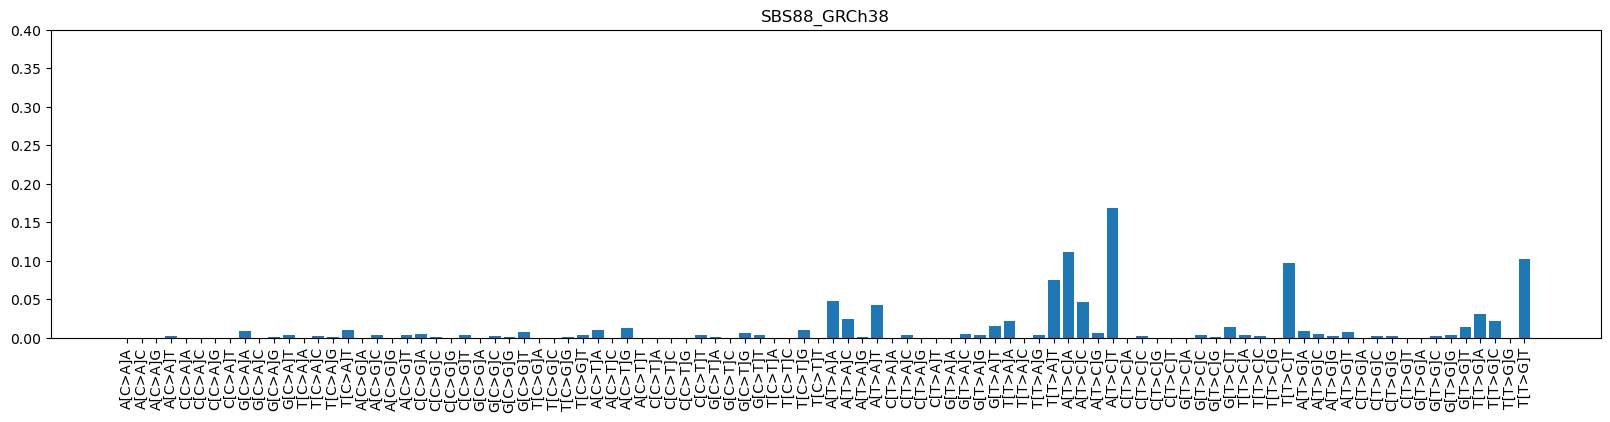

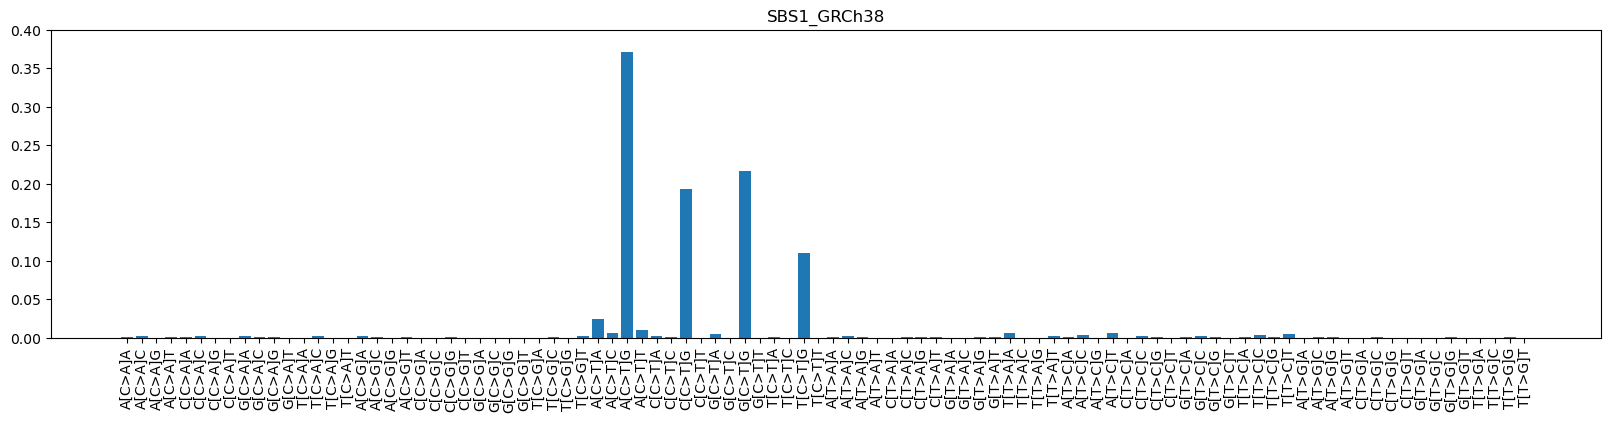

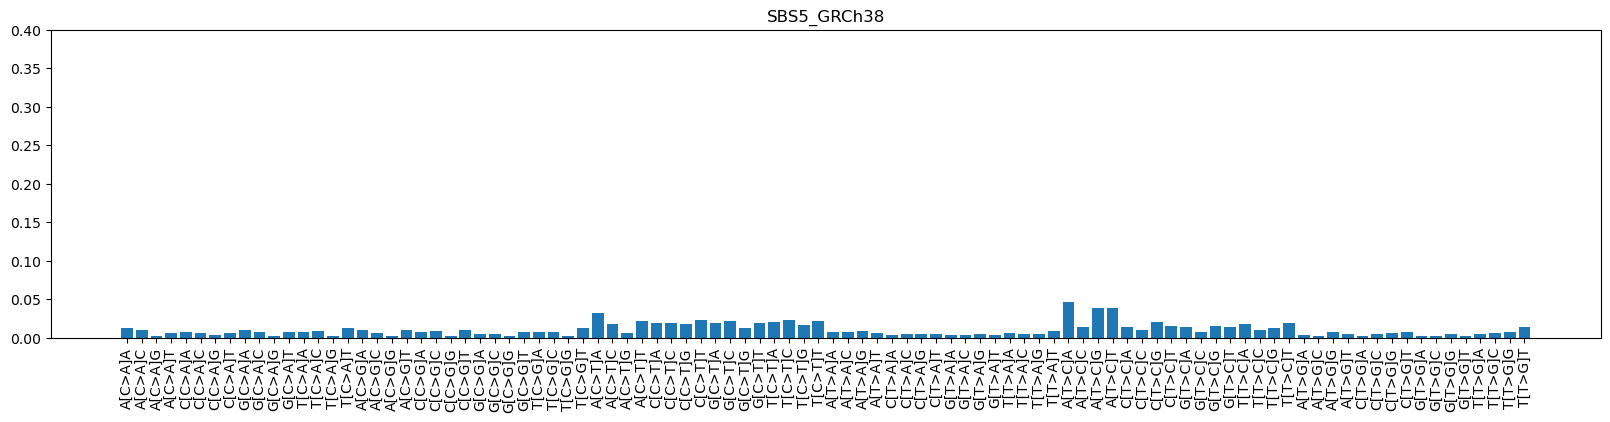

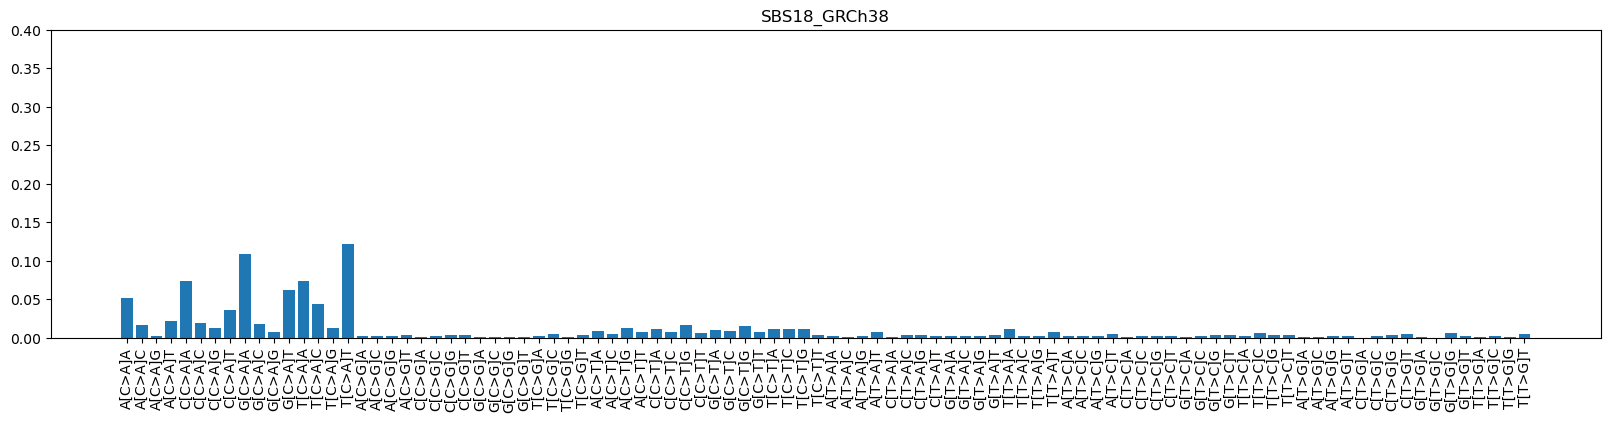

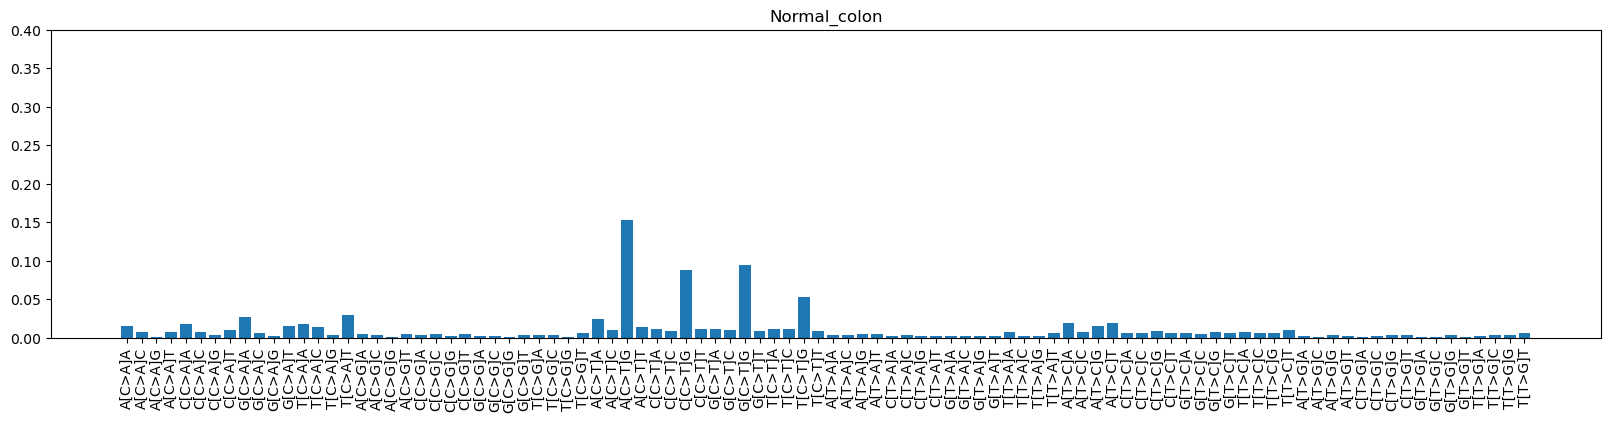

In [10]:
for col in final_df.columns[1:]:
    fig = plt.figure(figsize=(20, 4))
    ax = fig.add_subplot()
    ax.bar(final_df["Context"], final_df[col])
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(top=0.4)

    plt.title(col)
    plt.show()

In [11]:
def vis_data(data, x_axis, labels=["Test"], title="Test", alpha=1):
    fig = plt.figure(figsize=(20, 4))
    ax = fig.add_subplot()
    for i in range(len(data)):
        ax.bar(x_axis, data[i], label=labels[i], alpha=alpha)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(top=0.4)

    plt.legend()
    plt.title(title)
    plt.show()

## 📊 Distribution Generators 

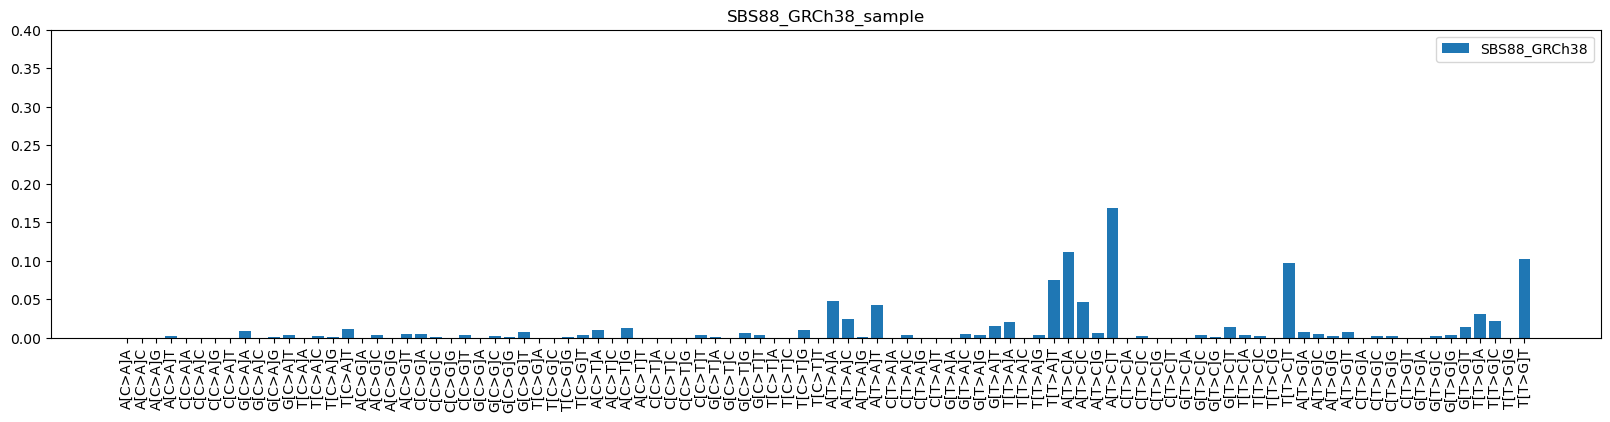

In [12]:
# We want a function that simulates the mutational signature of a weighted
# combination of SBS88_GRCh38 and the Normal-colon
# something like a*SBS88 + (1 - a)*Normal-colon

# test
samples = random.choices(range(96), final_df["SBS88_GRCh38"], k=10**6)
counts_scaled = np.bincount(samples, minlength=96)/len(samples)

vis_data([counts_scaled], final_df["Context"], ["SBS88_GRCh38"], "SBS88_GRCh38_sample")

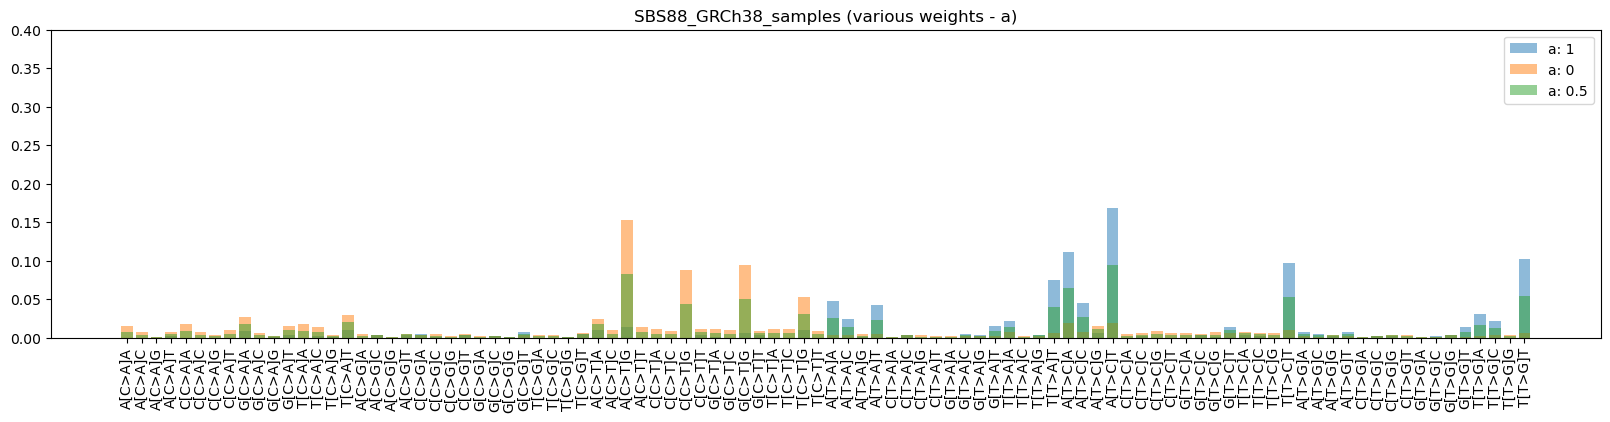

In [14]:
# parametrized function
def sample_mutational_signature(df, distrib, a=1, k=10**6):
    '''
    Args:
        df: Dataframe with the data 
        distrib: Target distribution to sample from (apart from the Normal-colon distribution)
        a: Weight of the target distribution (1-a will be the weight of the Normal-colon distribution)
        k: Number of samples
    '''
    final_distrib = a*final_df[distrib] + (1-a)*final_df["Normal_colon"]
    samples = random.choices(range(96), final_distrib, k=k)
    counts_scaled = np.bincount(samples, minlength=96)/len(samples)
    return counts_scaled

# test
a_1, a_2, a_3 = 1, 0, 0.5
test_1 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_1)
test_2 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_2)
test_3 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_3)
vis_data([test_1, test_2, test_3], final_df["Context"], [f"a: {a_1}", f"a: {a_2}", f"a: {a_3}"],
          f"SBS88_GRCh38_samples (various weights - a)", 0.5)

In [26]:
#gaussian
def simulate_gaussian(df, distrib, mean_a, n_trials=200, n_mutations=5000):
    '''
    mean_a: target proportion of SSBS
    std fixed at 0.1 of mean (same as paper)
    '''
    results=[]
    for __ in range(n_trials):
        a=np.random.normal(loc=mean_a, scale=0.1**mean_a)
        a=np.clip(a,0,1)
        spectrum=sample_mutational_signature(df, distrib, a, k=n_mutations)
        results.append(spectrum)
    return np.array(results) # shape (n_trials,96)

#beta (naturally bonded between 0 nd 1)
def simulate_beta(df, distrib, mean_a, variance=None, n_trials=200, n_mutations=5000):
    '''
    Parameterised by mean and variance.
    Default variance = (0.1 * mean_a)^2 to match Gaussian spread.
    '''
    if variance is None:
        variance = (0.1 * mean_a) ** 2

    max_variance = mean_a * (1 - mean_a) * 0.99
    variance = min(variance, max_variance)
    
    alpha = mean_a * (mean_a * (1 - mean_a) / variance - 1)
    beta  = (1 - mean_a) * (mean_a * (1 - mean_a) / variance - 1)
    
    results = []
    for _ in range(n_trials):
        a = np.random.beta(alpha, beta)
        spectrum = sample_mutational_signature(df, distrib, a, k=n_mutations)
        results.append(spectrum)
    return np.array(results)

#log-normal (right skewed)
def simulate_lognormal(df, distrib, mean_a, n_trials=200, n_mutations=5000):
    '''
    Log-normal parameterised so the median equals mean_a.
    sigma fixed at 0.3 (moderate right skew).
    '''
    sigma = 0.3
    mu = np.log(mean_a)
    
    results = []
    for _ in range(n_trials):
        a = np.random.lognormal(mu, sigma)
        a = np.clip(a, 0, 1)
        spectrum = sample_mutational_signature(df, distrib, a, k=n_mutations)
        results.append(spectrum)
    return np.array(results)

In [27]:
tcga = pd.read_csv("tcga_data.csv", sep="\t", low_memory=False)
sample_counts = tcga.groupby("Sample ID")["# Mut in Sample"].first().dropna()
sample_counts = sample_counts[sample_counts > 50].values

In [28]:
# Run simulations 
n_mutations = int(np.median(sample_counts))
n_trials = 200

gauss_results = simulate_gaussian(final_df, "SBS88_GRCh38", mean_a=0.05, 
                                   n_trials=n_trials, n_mutations=n_mutations)

beta_results  = simulate_beta(final_df, "SBS88_GRCh38", mean_a=0.05, 
                               n_trials=n_trials, n_mutations=n_mutations)

logn_results  = simulate_lognormal(final_df, "SBS88_GRCh38", mean_a=0.05, 
                                    n_trials=n_trials, n_mutations=n_mutations)

print(f"gauss_results shape: {gauss_results.shape}")   # should be (200, 96)
print(f"beta_results shape:  {beta_results.shape}")
print(f"logn_results shape:  {logn_results.shape}")

gauss_results shape: (200, 96)
beta_results shape:  (200, 96)
logn_results shape:  (200, 96)


In [29]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (norm(a) * norm(b))

true_sbs88 = final_df["SBS88_GRCh38"].values

for label, results in [("Gaussian", gauss_results), 
                        ("Beta", beta_results), 
                        ("LogNormal", logn_results)]:
    sims = [cosine_similarity(r, true_sbs88) for r in results]
    print(f"{label}: mean cosine = {np.mean(sims):.4f}, std = {np.std(sims):.4f}")

Gaussian: mean cosine = 0.4449, std = 0.3140
Beta: mean cosine = 0.2555, std = 0.0572
LogNormal: mean cosine = 0.2590, std = 0.0638


In [30]:
injection_levels = [0.01, 0.05, 0.10, 0.15, 0.20]
n_trials = 200

# Pull mutation counts from TCGA
tcga = pd.read_csv("tcga_data.csv", sep="\t", low_memory=False)
sample_counts = tcga.groupby("Sample ID")["# Mut in Sample"].first().dropna()
sample_counts = sample_counts[sample_counts > 50].values

true_sbs88 = final_df["SBS88_GRCh38"].values

results = {"Gaussian": {}, "Beta": {}, "LogNormal": {}}

for level in injection_levels:
    n_muts = int(np.random.choice(sample_counts))
    results["Gaussian"][level]  = simulate_gaussian(final_df, "SBS88_GRCh38", level, n_trials, n_muts)
    results["Beta"][level]      = simulate_beta(final_df, "SBS88_GRCh38", level, n_trials, n_muts)
    results["LogNormal"][level] = simulate_lognormal(final_df, "SBS88_GRCh38", level, n_trials, n_muts)

In [31]:
cosine_results = {dist: {} for dist in results}

for dist, levels in results.items():
    for level, spectra in levels.items():
        sims = [cosine_similarity(s, true_sbs88) for s in spectra]
        cosine_results[dist][level] = sims

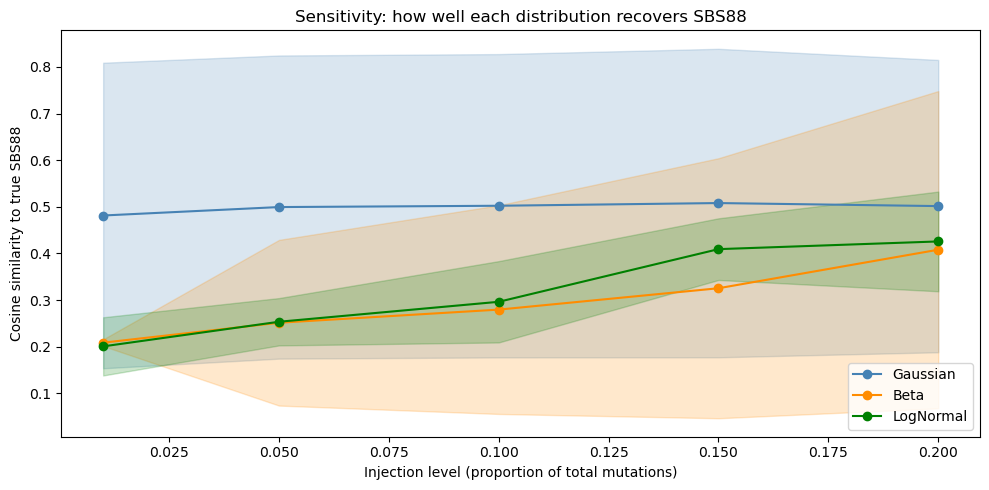

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = {"Gaussian": "steelblue", "Beta": "darkorange", "LogNormal": "green"}

for dist, levels in cosine_results.items():
    means = [np.mean(levels[l]) for l in injection_levels]
    stds  = [np.std(levels[l])  for l in injection_levels]
    ax.plot(injection_levels, means, marker="o", label=dist, color=colors[dist])
    ax.fill_between(injection_levels,
                    np.array(means) - np.array(stds),
                    np.array(means) + np.array(stds),
                    alpha=0.2, color=colors[dist])

ax.set_xlabel("Injection level (proportion of total mutations)")
ax.set_ylabel("Cosine similarity to true SBS88")
ax.set_title("Sensitivity: how well each distribution recovers SBS88")
ax.legend()
plt.tight_layout()
plt.show()

C:\Users\adele\AppData\Local\Temp\ipykernel_29576\2964465793.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=list(cosine_results.keys()))
C:\Users\adele\AppData\Local\Temp\ipykernel_29576\2964465793.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=list(cosine_results.keys()))
C:\Users\adele\AppData\Local\Temp\ipykernel_29576\2964465793.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=list(cosine_results.keys()))
C:\Users\adele\AppData\Local\Temp\ipykernel_29576\2964465793.py:5: MatplotlibDeprecationWarning: The 'labels' pa

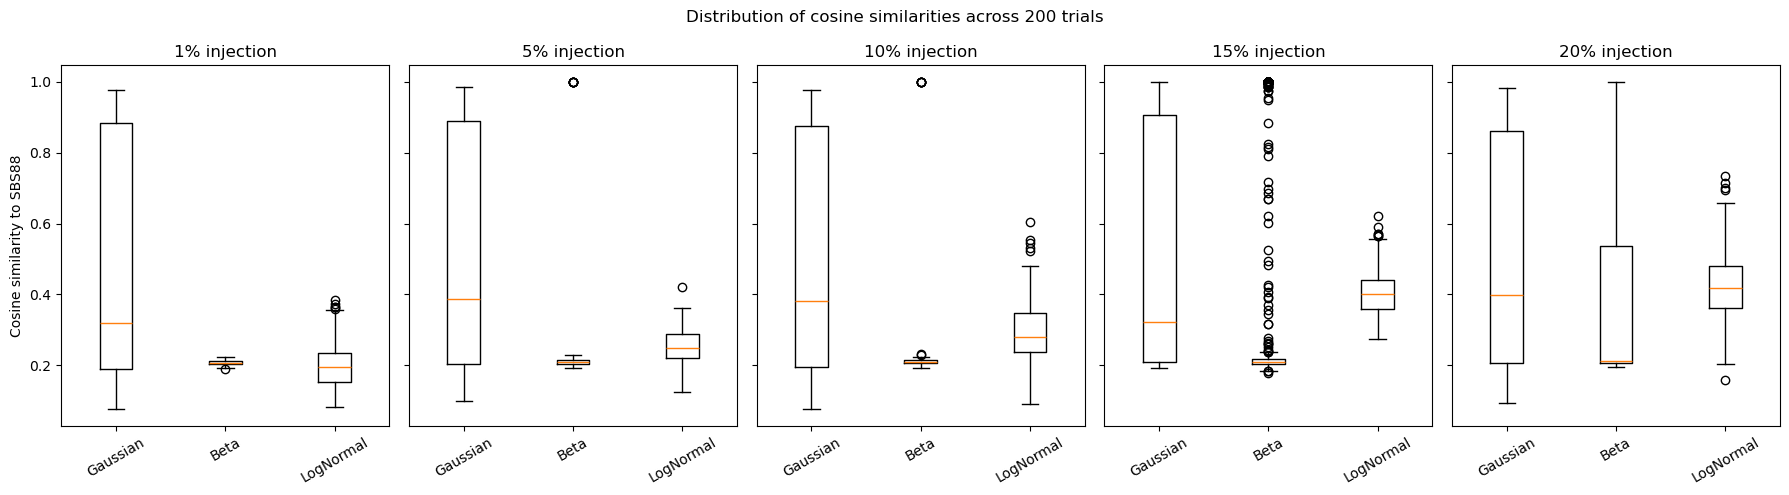

In [33]:
fig, axes = plt.subplots(1, len(injection_levels), figsize=(18, 5), sharey=True)

for i, level in enumerate(injection_levels):
    data  = [cosine_results[d][level] for d in cosine_results]
    axes[i].boxplot(data, labels=list(cosine_results.keys()))
    axes[i].set_title(f"{int(level*100)}% injection")
    axes[i].tick_params(axis="x", rotation=30)
    if i == 0:
        axes[i].set_ylabel("Cosine similarity to SBS88")

plt.suptitle("Distribution of cosine similarities across 200 trials")
plt.tight_layout()
plt.show()

In [34]:
summary_rows = []
for dist in cosine_results:
    for level in injection_levels:
        vals = cosine_results[dist][level]
        summary_rows.append({
            "Distribution": dist,
            "Injection level": f"{int(level*100)}%",
            "Mean cosine": round(np.mean(vals), 4),
            "Std": round(np.std(vals), 4),
            "Min": round(np.min(vals), 4),})

summary_df = pd.DataFrame(summary_rows)
print(summary_df.to_string(index=False))

Distribution Injection level  Mean cosine    Std    Min
    Gaussian              1%       0.4813 0.3278 0.0767
    Gaussian              5%       0.4994 0.3252 0.0993
    Gaussian             10%       0.5022 0.3254 0.0786
    Gaussian             15%       0.5080 0.3309 0.1922
    Gaussian             20%       0.5015 0.3136 0.0947
        Beta              1%       0.2085 0.0072 0.1897
        Beta              5%       0.2512 0.1777 0.1919
        Beta             10%       0.2794 0.2238 0.1922
        Beta             15%       0.3253 0.2789 0.1788
        Beta             20%       0.4079 0.3403 0.1960
   LogNormal              1%       0.2005 0.0624 0.0839
   LogNormal              5%       0.2534 0.0508 0.1247
   LogNormal             10%       0.2962 0.0872 0.0913
   LogNormal             15%       0.4092 0.0661 0.2731
   LogNormal             20%       0.4257 0.1069 0.1598
